# Hessian of CNN (Input layer)

https://qiita.com/shiita0903/items/b41cb370dd9aab5e382c

In [2]:
import numpy as np
import tensorflow as tf

import keras
import keras.backend as K

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.datasets import mnist

from tqdm import tqdm_notebook as tqdm
from scipy.stats import norm

Using TensorFlow backend.


In [3]:
with keras.utils.CustomObjectScope({'GlorotUniform': keras.initializers.glorot_uniform()}):
        model = keras.models.load_model('trained_model/trained_cnn_v0.h5', compile=False)

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 512)               401920    
_________________________________________________________________
relu_1 (Activation)          (None, 512)               0         
_________________________________________________________________
fc_2 (Dense)                 (None, 256)               131328    
_________________________________________________________________
relu_2 (Activation)          (None, 256)               0         
_________________________________________________________________
fc_3 (Dense)                 (None, 256)               65792     
_________________________________________________________________
relu_3 (Activation)          (None, 256)               0         
__________

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
del mnist

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Ohe-Hot encoding
y_train = keras.utils.np_utils.to_categorical(y_train) 
y_test  = keras.utils.np_utils.to_categorical(y_test) 

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [7]:
y_hat = model.predict(x_train[0].reshape(1, 28, 28))
y_hat.shape

(1, 10)

In [8]:
y = y_train[0]
y.shape

(10,)

In [11]:
y_true = K.placeholder((None, 10))

# loss = K.variable()
loss = tf.keras.losses.MSE(y_true, model.output)
input_layer = model.layers[0].output
hessian = tf.hessians(loss, input_layer)[0]


hessian_matrix_list = []

N = len(x_test)
# N = 1000
for idx in tqdm(range(N)):
    x = x_test[idx].reshape(1, 28, 28)
    y = y_test[idx].reshape(1, -1)

    tf_session = K.get_session()
    hessian_matrix = hessian.eval({model.input: x, y_true: y}, session=tf_session)
    hessian_matrix = np.squeeze(hessian_matrix)
    hessian_matrix_list.append(hessian_matrix)
    del hessian_matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


In [ ]:
fisher_info_matrix= np.zeros((784,784))
for idx in tqdm(range(len(hessian_matrix_list))):
    fisher_info_matrix = (idx / (idx + 1)) * hessian_matrix_list[idx] + (1 / (idx + 1)) * fisher_info_matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
fisher_info_matrix

In [45]:
fisher_info_matrix= np.zeros((784,784))

In [ ]:
https://doi.org/10.1145/3386569.3392409

In [46]:
hessian_matrix = np.squeeze(hessian_matrix)
hessian_matrix.shape

(784, 784)

In [47]:
hessian_matrix

array([[ 2.2680073e-14, -1.6510597e-14, -2.8413991e-14, ...,
         2.8841614e-14,  1.5899237e-14,  4.1526935e-14],
       [-1.6802654e-14,  1.3027133e-14,  2.1174035e-14, ...,
        -2.1065391e-14, -1.1912411e-14, -3.1149765e-14],
       [-2.8325403e-14,  2.1424396e-14,  3.5611366e-14, ...,
        -3.5715185e-14, -1.9991638e-14, -5.2252158e-14],
       ...,
       [ 2.8296623e-14, -2.1309059e-14, -3.5560649e-14, ...,
         3.5714433e-14,  1.9955619e-14,  5.2153824e-14],
       [ 1.5939202e-14, -1.1928391e-14, -2.0019354e-14, ...,
         2.0145987e-14,  1.1228258e-14,  2.9341580e-14],
       [ 4.1652225e-14, -3.1148200e-14, -5.2310871e-14, ...,
         5.2654096e-14,  2.9337738e-14,  7.6664078e-14]], dtype=float32)

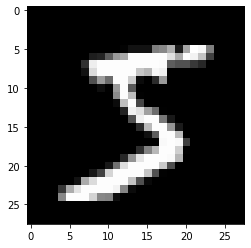

In [50]:
plt.imshow(x_train[0].reshape(28, 28), "gray")
plt.show()

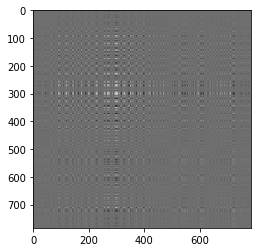

In [48]:
plt.imshow(hessian_matrix, "gray")
plt.show()

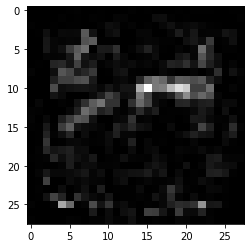

In [49]:
plt.imshow(np.diag(hessian_matrix).reshape(28,28), "gray")
plt.show()

In [92]:
eig_values, eig_vectors = np.linalg.eig(hessian_matrix)

eig_values = eig_values.astype(np.float32)
eig_vectors = eig_vectors.astype(np.float32)

for i in range(len(eig_vectors)):
    eig_vectors[i] = eig_vectors[i] / np.linalg.norm(eig_vectors[i], ord=2)
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [93]:
max(eig_values)

1.8674873e-09

In [94]:
# L2 norm
idx = 0
np.linalg.norm(eig_vectors[idx], ord=2)

0.99999994

1.8674873e-09


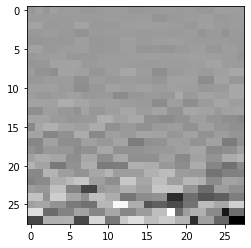

In [95]:
idx = 0
print(eig_values[idx])
plt.imshow(eig_vectors[idx].reshape(28,28), "gray")
plt.show()

8.0688044e-18


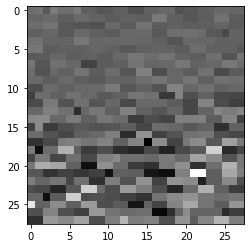

In [96]:
idx = 5
print(eig_values[idx])
plt.imshow(eig_vectors[idx].reshape(28,28), "gray")
plt.show()

In [103]:
# L2 norm
idx = 0
np.linalg.norm(eig_vectors[idx], ord=2)

0.99999994

1.8674873e-09


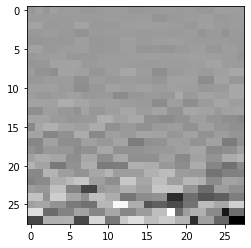

[[0.02773025 0.01324864 0.01304613 0.10564908 0.00501046 0.5532398
  0.04181771 0.00996269 0.18734905 0.04294628]]
5


In [108]:
idx = 0
print(eig_values[idx])

# x_dummy = (1/2) * x_train[0] + (1/2) * eig_vectors[idx]
x_dummy = eig_vectors[idx]

plt.imshow(x_dummy.reshape(28,28), "gray")
plt.show()

y_hat = model.predict(x_dummy.reshape(1, 28, 28))
print(y_hat)
print(np.argmax(y_hat))

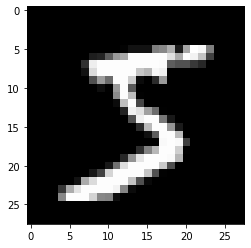

In [109]:
plt.imshow(x_train[0].reshape(28, 28), "gray")
plt.show()

# ge


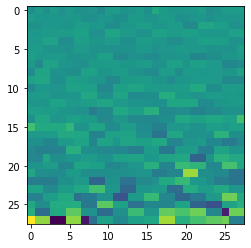

In [53]:
plt.imshow(eig_vectors[0].reshape(28,28))